In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month            144 non-null object
AirPassengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [4]:
# parse the date into dataframe

df['Month'] = pd.to_datetime(df['Month'],infer_datetime_format= True)
# set index as month
index_date = df.set_index(['Month'])

In [5]:
index_date.head()

,AirPassengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Text(0, 0.5, 'Number of air passenger')

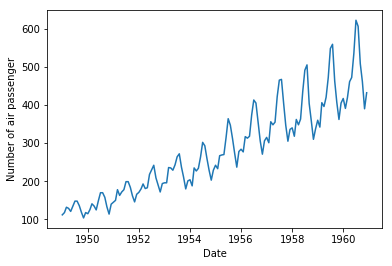

In [6]:
plt.plot(index_date)
plt.xlabel('Date')
plt.ylabel('Number of air passenger')

In [7]:
# Determining rolling statistics
rolmean =index_date.rolling(window=12).mean()  # window =12 --> means for 12 month

rolstd= index_date.rolling(window=12).std()

print(rolmean, rolstd)

            AirPassengers
Month                    
1949-01-01            NaN
1949-02-01            NaN
1949-03-01            NaN
1949-04-01            NaN
1949-05-01            NaN
1949-06-01            NaN
1949-07-01            NaN
1949-08-01            NaN
1949-09-01            NaN
1949-10-01            NaN
1949-11-01            NaN
1949-12-01     126.666667
1950-01-01     126.916667
1950-02-01     127.583333
1950-03-01     128.333333
1950-04-01     128.833333
1950-05-01     129.166667
1950-06-01     130.333333
1950-07-01     132.166667
1950-08-01     134.000000
1950-09-01     135.833333
1950-10-01     137.000000
1950-11-01     137.833333
1950-12-01     139.666667
1951-01-01     142.166667
1951-02-01     144.166667
1951-03-01     147.250000
1951-04-01     149.583333
1951-05-01     153.500000
1951-06-01     155.916667
...                   ...
1958-07-01     376.333333
1958-08-01     379.500000
1958-09-01     379.500000
1958-10-01     380.500000
1958-11-01     380.916667
1958-12-01  

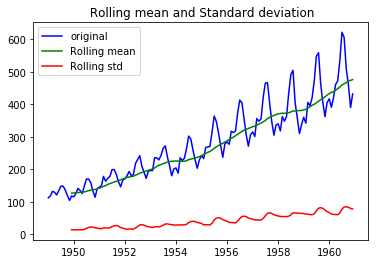

In [8]:
orig = plt.plot(index_date, color= 'blue', label= 'original')
mean = plt.plot(rolmean, color= 'green', label= 'Rolling mean')
std = plt.plot(rolstd, color= 'red', label= 'Rolling std')
plt.legend(loc= 'best')
plt.title(' Rolling mean and Standard deviation')
plt.show()

* Here is mean and std is not constant so our data is not stationary

In [9]:
# perform dickey-fuller test
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(index_date['AirPassengers'], autolag= 'AIC') # achikey information criteria

In [10]:
dfout = pd.Series(dftest[0:4],index=['Test statistics', 'p-value', '#Lag used','Number of observations used'])
for key, value in dftest[4].items():
    dfout['Critical values (%s)' %key]= value
    
print(dfout)

Test statistics                  0.815369
p-value                          0.991880
#Lag used                       13.000000
Number of observations used    130.000000
Critical values (1%)            -3.481682
Critical values (5%)            -2.884042
Critical values (10%)           -2.578770
dtype: float64


In [11]:
print('ADF statistics: %f' %dftest[0])
print('p-value: %f' %dftest[1])

ADF statistics: 0.815369
p-value: 0.991880


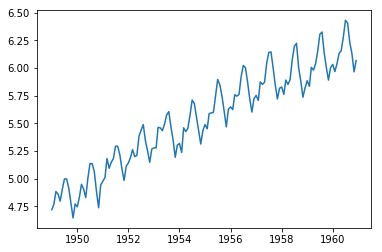

In [12]:
# Estimating trend
log_indexdate = np.log(index_date)
plt.plot(log_indexdate)

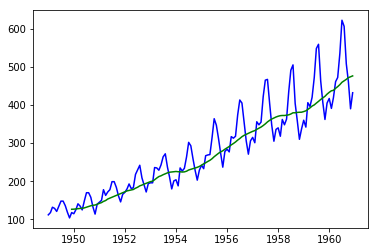

In [13]:
movingavg =log_indexdate.rolling(window=12).mean()  # window =12 --> means for 12 month

movingstd= log_indexdate.rolling(window=12).std()


orig = plt.plot(index_date, color= 'blue')
mean = plt.plot(rolmean, color= 'green')
plt.show()

In [14]:
dflogscale_movingavg = log_indexdate - movingavg

#remove na values
dflogscale_movingavg.dropna(inplace= True)
dflogscale_movingavg.head()

,AirPassengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [27]:
from statsmodels.tsa.stattools import adfuller

def test_stationary(df):
    # determinig rolling statistics
    rollmean = df.rolling(window=12).mean()
    rollstd= df.rolling(window=12).std()
    
    # plot the rolling statistics
    plt.plot(df, color='blue', label='original')
    plt.plot(rollmean, color= 'red', label='rollmean')
    plt.plot(rollstd, color= 'green', label='rollstd')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # perform augmented dickfuller test
    dftest= adfuller(df['AirPassengers'], autolag= 'AIC')
    dfout = pd.Series(dftest[0:4],index=['Test statistics', 'p-value', '#Lag used','Number of observations used'])
    for key, value in dftest[4].items():
        dfout['Critical values (%s)' %key]= value
    
    print(dfout)
    

Test statistics                 -3.162908
p-value                          0.022235
#Lag used                       13.000000
Number of observations used    119.000000
Critical values (1%)            -3.486535
Critical values (5%)            -2.886151
Critical values (10%)           -2.579896
dtype: float64


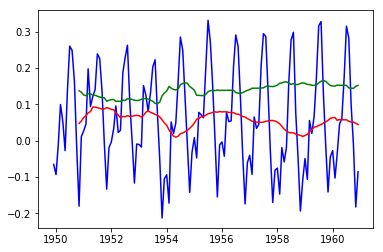

In [16]:
test_stationary(dflogscale_movingavg)

* here p-values is less than significant level
* From the graph we can see the mean and standard deviation is somehow stationary( better than previous)

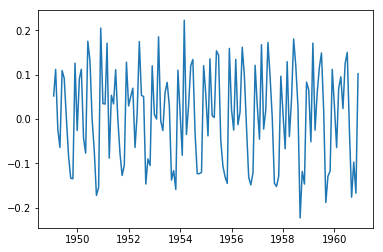

In [28]:
# shiting time series value to use in forcasting
dflogDiffShif = log_indexdate - log_indexdate.shift()
plt.plot(dflogDiffShif)

Test statistics                 -2.717131
p-value                          0.071121
#Lag used                       14.000000
Number of observations used    128.000000
Critical values (1%)            -3.482501
Critical values (5%)            -2.884398
Critical values (10%)           -2.578960
dtype: float64


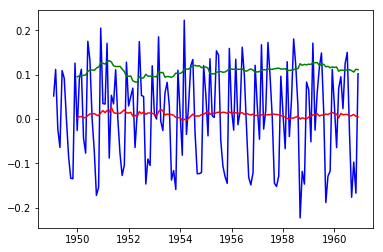

In [26]:
dflogDiffShif.dropna(inplace= True)
test_stationary(dflogDiffShif)

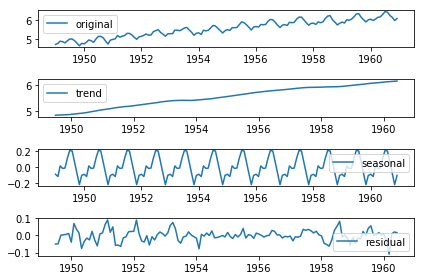

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose( log_indexdate)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(log_indexdate,label= 'original')
plt.legend(loc= 'best')

plt.subplot(412)
plt.plot(trend,label= 'trend')
plt.legend(loc= 'best')

plt.subplot(413)
plt.plot(seasonal,label= 'seasonal')
plt.legend(loc= 'best')

plt.subplot(414)
plt.plot(residual,label= 'residual')
plt.legend(loc= 'best')
plt.tight_layout()







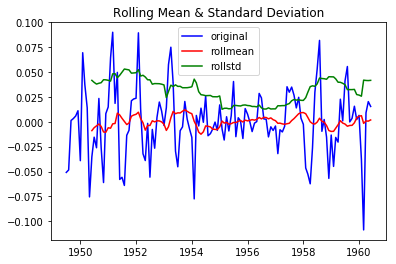

Test statistics               -6.332387e+00
p-value                        2.885059e-08
#Lag used                      9.000000e+00
Number of observations used    1.220000e+02
Critical values (1%)          -3.485122e+00
Critical values (5%)          -2.885538e+00
Critical values (10%)         -2.579569e+00
dtype: float64


In [34]:
decomposedLogData = residual
decomposedLogData.dropna(inplace= True)
test_stationary(decomposedLogData)

* Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).

* 

* Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

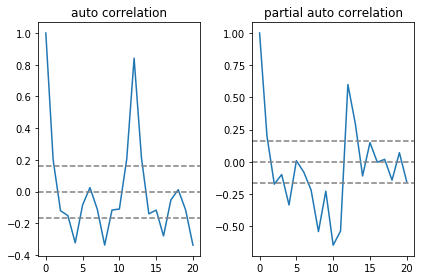

In [35]:
# plot acf and pacf graph  acf-> autocorrelation Function  pacf -> partial actocorrelation graph
from statsmodels.tsa.stattools import acf, pacf
dflogDiffShif.dropna(inplace= True)
lag_acf = acf(dflogDiffShif , nlags= 20)
lag_pacf = pacf(dflogDiffShif , nlags= 20, method ='ols') # ordinary square method

# plot acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle= '--', color= 'gray')
plt.axhline( y= -1.96/np.sqrt(len(dflogDiffShif)), linestyle='--', color= 'gray')
plt.axhline( y= 1.96/np.sqrt(len(dflogDiffShif)), linestyle='--', color= 'gray')
plt.title('auto correlation')

# plot pacf
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle= '--', color= 'gray')
plt.axhline( y= -1.96/np.sqrt(len(dflogDiffShif)), linestyle='--', color= 'gray')
plt.axhline( y= 1.96/np.sqrt(len(dflogDiffShif)), linestyle='--', color= 'gray')
plt.title('partial auto correlation')
plt.tight_layout()

* we need to find the value of p and q from above graph , here we check line drops at zero 1st time. In 1st graph(acf) if we check we get value of p is near about 2 and same in pacf graph we get q value is also 2.

* Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

* 

* Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

* 

* Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.

C:\Users\Gaurav\Anaconda3\envs\kaggle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Gaurav\Anaconda3\envs\kaggle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.502303')

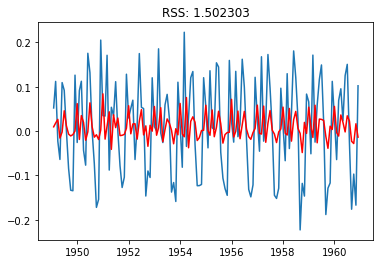

In [37]:
from statsmodels.tsa.arima_model import ARIMA

# AR model
model= ARIMA( log_indexdate, order= (2,1,0))
result_AR = model.fit(disp= -1)
plt.plot(dflogDiffShif)
plt.plot(result_AR.fittedvalues, color= 'red')
plt.title('RSS: %4f' %sum((result_AR.fittedvalues - dflogDiffShif['AirPassengers'])**2))
# higher the rss bad is the model

C:\Users\Gaurav\Anaconda3\envs\kaggle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Gaurav\Anaconda3\envs\kaggle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.472140')

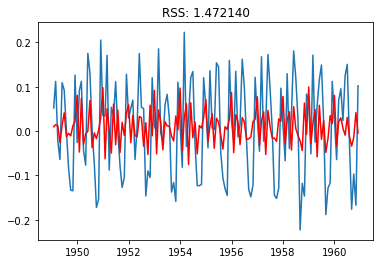

In [39]:
# MA model
model = ARIMA(log_indexdate, order=(0,1,2))
result_MA = model.fit(disp= -1)
plt.plot(dflogDiffShif)
plt.plot(result_MA.fittedvalues,color= 'red')
plt.title('RSS: %4f' % sum( (result_MA.fittedvalues - dflogDiffShif['AirPassengers'])**2))


C:\Users\Gaurav\Anaconda3\envs\kaggle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Gaurav\Anaconda3\envs\kaggle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.029152')

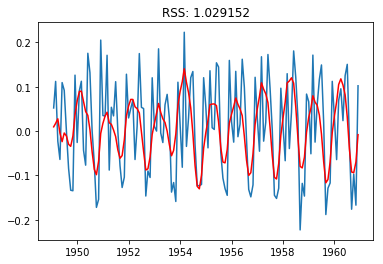

In [40]:
# combine model
model = ARIMA(log_indexdate, order= (2,1,2))
result_ARIMA = model.fit(disp=-1)
plt.plot(dflogDiffShif)
plt.plot(result_ARIMA.fittedvalues,color= 'red')
plt.title('RSS: %4f' % sum( (result_ARIMA.fittedvalues - dflogDiffShif['AirPassengers'])**2))

* Here we can see that the AR and MA models have almost the same RSS but combined is significantly better.

### Taking it back to original scale

In [42]:
prediction_ARIMA_diff = pd.Series(result_ARIMA.fittedvalues, copy= True)
print(prediction_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


* Notice that these start from ‘1949-02-01’ and not the first month. This is because we took a lag by 1 and first element doesn’t have anything before it to subtract from.

In [45]:
predictions_ARIMA_diff_cumsum = prediction_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [47]:
predicted_ARIMA_log = pd.Series(log_indexdate['AirPassengers'].ix[0], index= log_indexdate.index)
predicted_ARIMA_log = predicted_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predicted_ARIMA_log.head()

C:\Users\Gaurav\Anaconda3\envs\kaggle\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

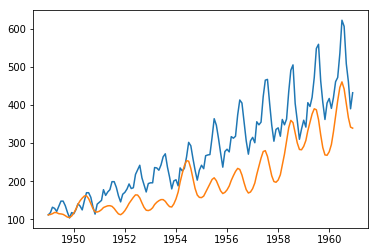

In [48]:
prediction_ARIMA = np.exp(predicted_ARIMA_log)
plt.plot(index_date)
plt.plot(prediction_ARIMA)

In [49]:
log_indexdate

,AirPassengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
1949-06-01,4.905275
1949-07-01,4.997212
1949-08-01,4.997212
1949-09-01,4.912655


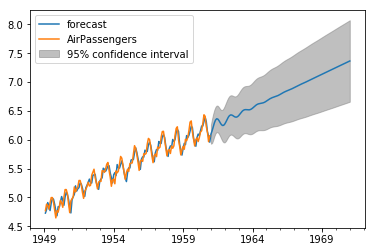

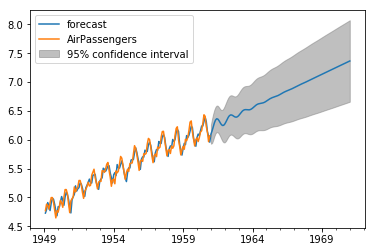

In [50]:
result_ARIMA.plot_predict(1,264)    # want to predict 10 yrs so datapoints would be 120 ( 10 * 12(months))  ( 144+120= 264)


In [53]:
# if you want to see numbers
result_ARIMA.forecast(steps= 120)

(array([6.09553406, 6.15281429, 6.22442997, 6.2924113 , 6.34164736,
        6.36359367, 6.35784677, 6.33139285, 6.29597517, 6.26447694,
        6.24738317, 6.25025176, 6.27275854, 6.30940339, 6.35151523,
        6.3898868 , 6.41727396, 6.43011056, 6.42906679, 6.41842471,
        6.40456136, 6.39403601, 6.39183078, 6.4001951 , 6.41833709,
        6.4429543 , 6.46937459, 6.49294005, 6.51024129, 6.51989034,
        6.52267571, 6.52112375, 6.51864515, 6.51853682, 6.52311922,
        6.53322368, 6.54812884, 6.56591575, 6.58410326, 6.60036553,
        6.61313274, 6.62192782, 6.62737784, 6.63093122, 6.63438683,
        6.63937982, 6.64696507, 6.65739849, 6.67015337, 6.68414265,
        6.69806639, 6.71077911, 6.72157738, 6.73033985, 6.73749809,
        6.74386376, 6.75037321, 6.75782594, 6.76668687, 6.77699831,
        6.78841329, 6.80032865, 6.81207205, 6.82308768, 6.83307141,
        6.84202495, 6.85022313, 6.85811222, 6.86617342, 6.87479154,
        6.88416308, 6.89426391, 6.90487898, 6.91

* How to find the order of differencing (d) in ARIMA model?
* The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick
* 
* If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced.
* 
* if the series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.
* 
* The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary.